In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from wordcloud   import WordCloud, STOPWORDS
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import numpy             as np
import pandas            as pd
from scipy.stats import norm
from textblob import TextBlob
from collections import Counter
import warnings
import string
import nltk
import re
warnings.filterwarnings("ignore")
stopwords = set(STOPWORDS)

In [ ]:
from google.colab import drive

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WebSocialAssessment/Bigtech - 12-07-2020 till 19-09-2020.csv')
alldata = dataset.count()
print(alldata)
# Remove duplicates based on tweet 'id'
dataset.drop_duplicates(subset=['twitter_id'], inplace=True)

# Display the first few rows
print(dataset.head())

# Get the names of columns in the dataset
column_names = dataset.columns.tolist()
print(column_names)

# Drop rows with any NA values in specified columns
data1 = dataset.dropna(subset=['created_at', 'file_name', 'followers', 'friends', 'group_name', 'location', 'retweet_count', 'screenname', 'search_query', 'text', 'twitter_id', 'username', 'polarity', 'partition_0', 'partition_1'])

# Save the cleaned DataFrame back to a CSV file
data1.to_csv('/content/drive/MyDrive/Colab Notebooks/WebSocialAssessment/cleandata.csv', index=False)

# Load the cleaned data to perform operations
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WebSocialAssessment/cleandata.csv')

# Count non-null values in each column
non_null_counts = data.count()
print(non_null_counts)

data.head()

created_at       866909
file_name        866909
followers        866909
friends          866909
group_name       866909
location         613993
retweet_count    866908
screenname       866908
search_query     866908
text             866906
twitter_id       866906
username         866878
polarity         866906
partition_0      866909
partition_1      866909
dtype: int64
            created_at file_name  followers  friends group_name  \
0  2020-07-12 09:24:26       AMD         25      114        AMD   
1  2020-07-12 09:09:36       AMD        159     1144        AMD   
2  2020-07-12 08:37:31       AMD       4931        7        AMD   
3  2020-07-12 08:31:24       AMD          9      188        AMD   
4  2020-07-12 08:16:45       AMD       1719        1        AMD   

         location  retweet_count     screenname search_query  \
0  United Kingdom            0.0  moffphcgaming         #AMD   
1    digitalverse            4.0     ironparr0t         #AMD   
2             NaN            0.0

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,2020-07-12 09:24:26,AMD,25,114,AMD,United Kingdom,0.0,moffphcgaming,#AMD,Been on holiday so back now. Gonna try get som...,1.282244e+18,🕹MoffPHC Gaming🕹,-0.3102,Technology,AMD
1,2020-07-12 09:09:36,AMD,159,1144,AMD,digitalverse,4.0,ironparr0t,#AMD,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,1.282241e+18,ironparrot,0.0000,Technology,AMD
2,2020-07-12 08:31:24,AMD,9,188,AMD,HAHA no....,0.0,XApochrypha,#AMD,Recently purchased everything for my first per...,1.282231e+18,XenosApochrypha,0.0000,Technology,AMD
3,2020-07-12 08:16:45,AMD,1719,1,AMD,digitalocean,1.0,LinuxDreams,#AMD,RT @LinuxReviews: #Linux architect Linus Torva...,1.282227e+18,LinuxDreams,-0.3612,Technology,AMD
4,2020-07-12 08:11:41,AMD,69,135,AMD,Amsterdam,1.0,LinuxReviews,#AMD,"#Linux architect Linus Torvalds: AVX512 Is ""A ...",1.282226e+18,LinuxReviews,-0.3612,Technology,AMD


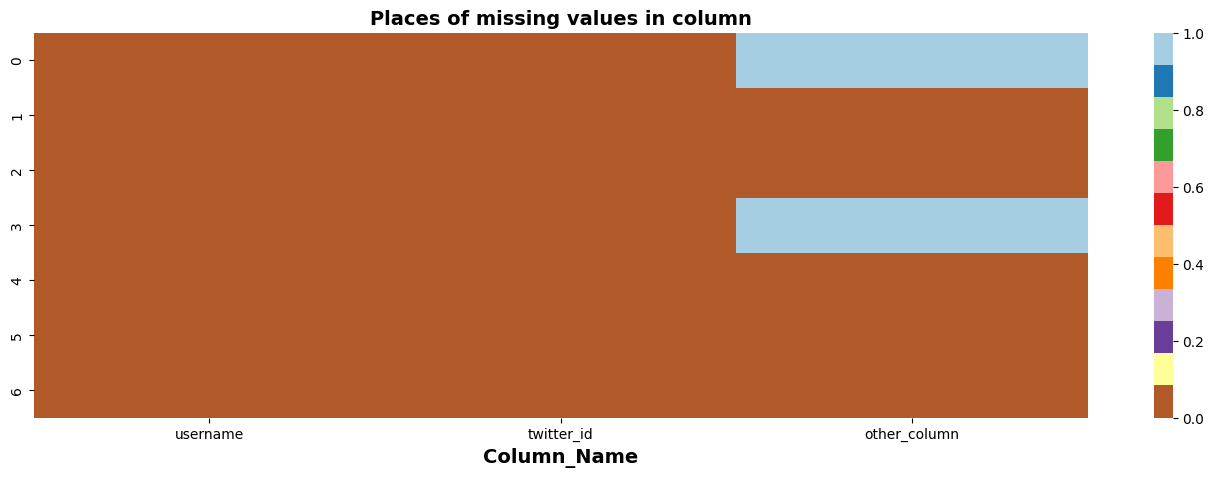

,username,twitter_id,other_column
0,user,101,NaN
1,102,102,data
2,103,103,data
3,104,104,NaN
4,105,105,data
5,ValidUser,106,data
6,User2,107,data


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing data
plt.figure(figsize=(17, 5))
sns.heatmap(data.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column", fontweight="bold", size=14)
plt.show()

# Data cleaning process
# Replace any non-alphanumeric character with an empty string in the 'username' column
data['username'] = data['username'].str.replace('[^a-zA-Z0-9_-]', '', regex=True)

# Replace usernames that are now empty or a single character with 'twitter_id'
data['username'] = data.apply(lambda row: str(row['twitter_id']) if len(row['username']) <= 1 else row['username'], axis=1)

# Show the cleaned data
data



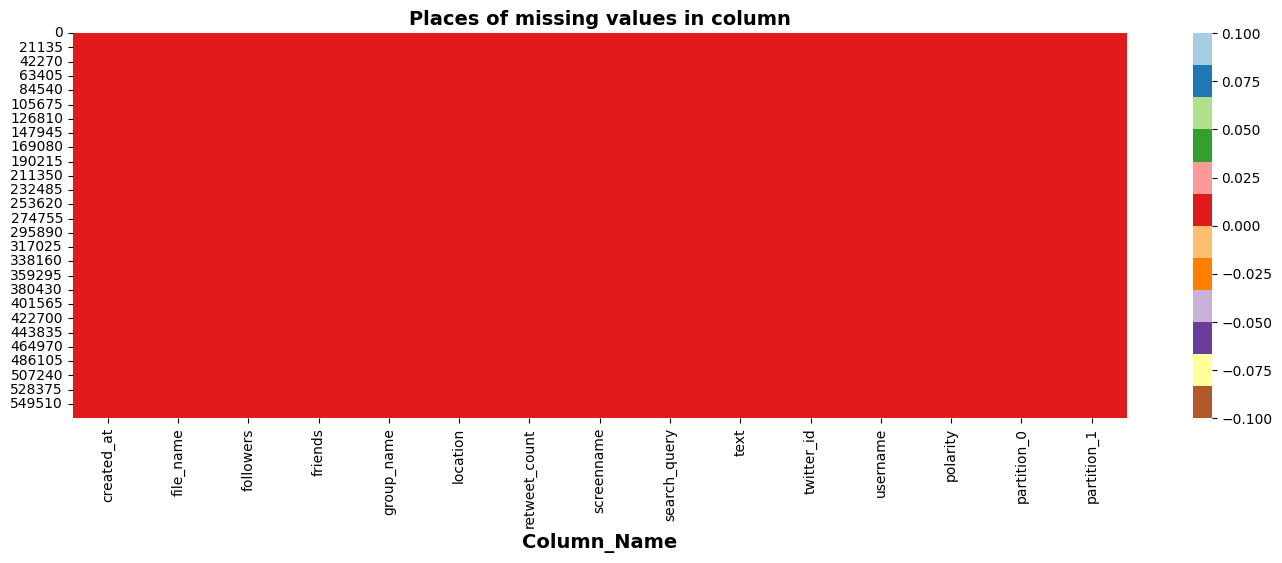

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(data.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [ ]:
import pandas as pd


# Sample data for demonstration
data = pd.DataFrame({
    'username': ['@user!', '!!', '?', '', 'a', 'ValidUser', 'User2', '3b'],
    'twitter_id': [101, 102, 103, 104, 105, 106, 107, 108]
})

# Define a mask to filter out rows where 'username' is non-character or one character after cleaning
mask = data['username'].str.replace('[^a-zA-Z0-9_-]', '', regex=True).str.len() > 1

# Apply the mask to the DataFrame to filter those rows
filtered_data = data.loc[mask]

# Display the filtered DataFrame
print(filtered_data)



    username  twitter_id
0     @user!         101
5  ValidUser         106
6      User2         107
7         3b         108
    username  twitter_id
0     @user!         101
1         !!         102
2          ?         103
3                    104
4          a         105
5  ValidUser         106
6      User2         107
7         3b         108


In [ ]:
df=data
def basic_eda(df, row_limit=5, list_elements_limit=10):
    ### rows and columns
    print('Info : There are {} columns in the dataset'.format(df.shape[1]))
    print('Info : There are {} rows in the dataset'.format(df.shape[0]))

    print("==================================================")

    ## data types
    print("\nData type information of different columns")
    dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
    cat_df = dtypes_df[dtypes_df['dtype']=='object']
    num_df = dtypes_df[dtypes_df['dtype']!='object']
    print('Info : There are {} categorical columns'.format(len(cat_df)))
    print('Info : There are {} numerical columns'.format(len(dtypes_df)-len(cat_df)))

    if list_elements_limit >= len(cat_df):
        print("Categorical columns : ", list(cat_df['column_name']))
    else:
        print("Categorical columns : ", list(cat_df['column_name'])[:list_elements_limit])

    if list_elements_limit >= len(num_df):
        print("Numerical columns : ", list(num_df['column_name']))
    else:
        print("Numerical columns : ", list(num_df['column_name'])[:list_elements_limit])

    #dtypes_df['dtype'].value_counts().plot.bar()
    display(dtypes_df.head(row_limit))

    print("==================================================")
    print("\nDescription of numerical variables")

    #### Describibg numerical columns
    desc_df_num = df[list(num_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_num.head(row_limit))

    print("==================================================")
    print("\nDescription of categorical variables")

    desc_df_cat = df[list(cat_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_cat.head(row_limit))

    return

In [ ]:
basic_eda(df)

Info : There are 15 columns in the dataset
Info : There are 570632 rows in the dataset

Data type information of different columns
Info : There are 10 categorical columns
Info : There are 5 numerical columns
Categorical columns :  ['created_at', 'file_name', 'group_name', 'location', 'screenname', 'search_query', 'text', 'username', 'partition_0', 'partition_1']
Numerical columns :  ['followers', 'friends', 'retweet_count', 'twitter_id', 'polarity']


,column_name,dtype
0,created_at,object
1,file_name,object
2,followers,int64
3,friends,int64
4,group_name,object



Description of numerical variables


,column_name,count,mean,std,min,25%,50%,75%,max
0,followers,570632.0,9.641929e+03,1.445928e+05,0.000000e+00,1.160000e+02,5.260000e+02,2.243000e+03,1.444344e+07
1,friends,570632.0,2.510809e+03,1.473851e+04,0.000000e+00,1.320000e+02,4.510000e+02,1.489000e+03,1.168982e+06
2,retweet_count,570632.0,1.507125e+02,1.786782e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.232600e+04
3,twitter_id,570632.0,1.294408e+18,7.225534e+15,1.280654e+18,1.287980e+18,1.294230e+18,1.300804e+18,1.307191e+18
4,polarity,570632.0,1.827146e-01,3.958038e-01,-9.975000e-01,0.000000e+00,0.000000e+00,5.080000e-01,9.968000e-01



Description of categorical variables


,column_name,count,unique,top,freq
0,created_at,570632,512930,2020-07-21 16:58:44,18
1,file_name,570632,10,Apple,81943
2,group_name,570632,10,Apple,81943
3,location,570632,74401,United States,21421
4,screenname,570632,228069,CoolDealCA,6833


In [ ]:
def polarity_to_sentiment(polarity):
    if polarity >= 0.5:
        return 'positive'
    else:
        return 'negative'

df['sentiment'] = df['polarity'].apply(polarity_to_sentiment)
df.head()

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1,sentiment
0,2020-07-12 09:24:26,AMD,25,114,AMD,United Kingdom,0.0,moffphcgaming,#AMD,Been on holiday so back now. Gonna try get som...,1.282244e+18,🕹MoffPHC Gaming🕹,-0.3102,Technology,AMD,negative
1,2020-07-12 09:09:36,AMD,159,1144,AMD,digitalverse,4.0,ironparr0t,#AMD,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,1.282241e+18,ironparrot,0.0000,Technology,AMD,negative
2,2020-07-12 08:31:24,AMD,9,188,AMD,HAHA no....,0.0,XApochrypha,#AMD,Recently purchased everything for my first per...,1.282231e+18,XenosApochrypha,0.0000,Technology,AMD,negative
3,2020-07-12 08:16:45,AMD,1719,1,AMD,digitalocean,1.0,LinuxDreams,#AMD,RT @LinuxReviews: #Linux architect Linus Torva...,1.282227e+18,LinuxDreams,-0.3612,Technology,AMD,negative
4,2020-07-12 08:11:41,AMD,69,135,AMD,Amsterdam,1.0,LinuxReviews,#AMD,"#Linux architect Linus Torvalds: AVX512 Is ""A ...",1.282226e+18,LinuxReviews,-0.3612,Technology,AMD,negative


In [ ]:
df['sentiment'].value_counts()

sentiment
negative    427014
positive    143618
Name: count, dtype: int64

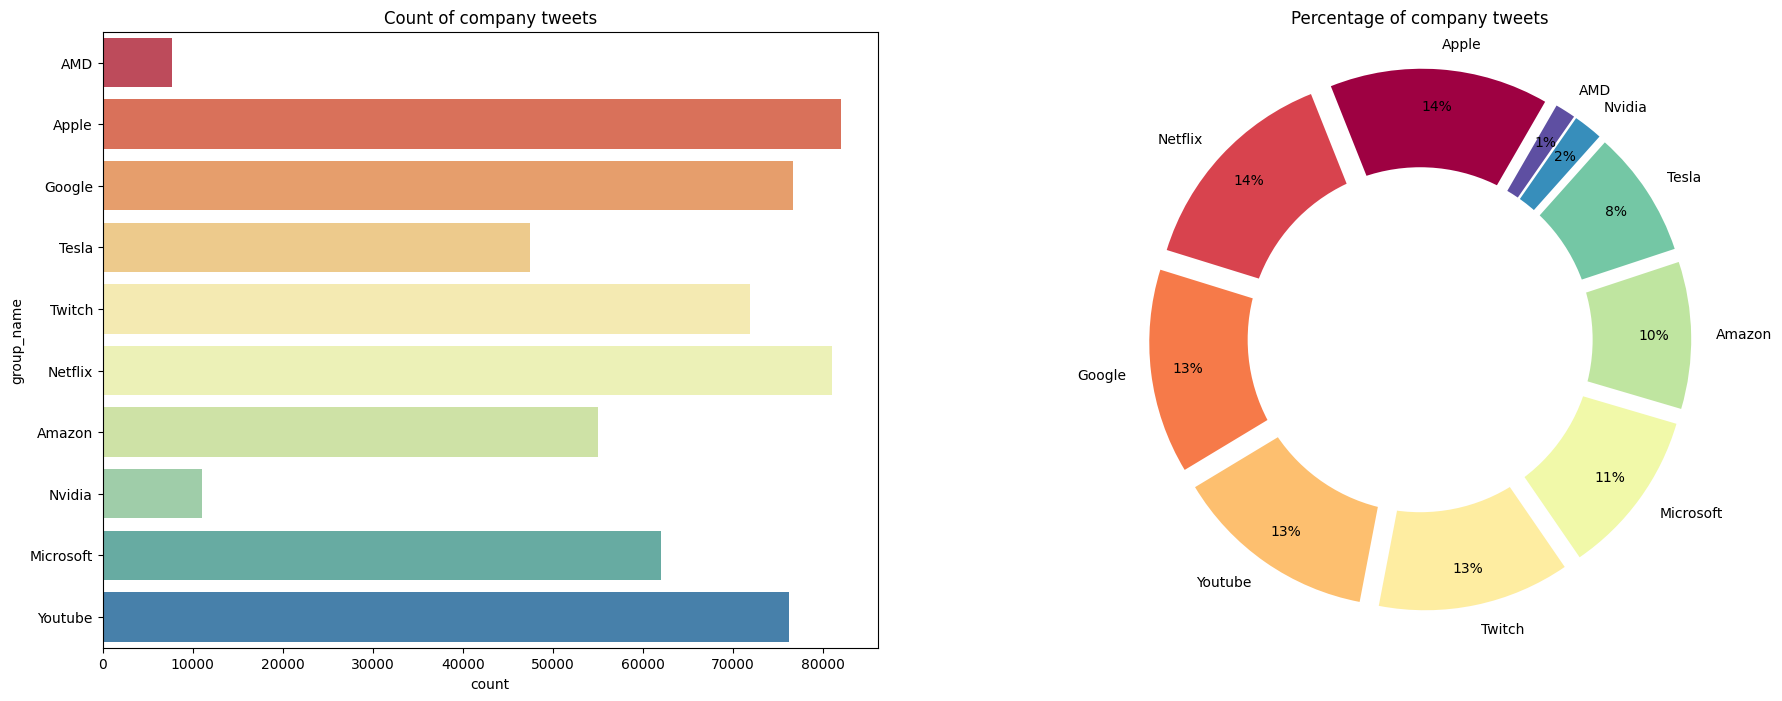

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



col = 'group_name'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(22,8))

# For the bar plot, you can use a palette to specify colors
sns.countplot(y=col, data=df, ax=ax1, palette='Spectral')  # or use any other palette
ax1.set_title("Count of company tweets")

# For the doughnut plot
labels = df[col].value_counts()[:10].index
sizes = df[col].value_counts()[:10].values
explode = (0.1,)*10  # Explode all slices for better visibility
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', pctdistance=0.85, startangle=60, colors=plt.cm.Spectral(np.linspace(0, 1, 10)))

# Draw a white circle at the center to create a doughnut plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax2.add_artist(centre_circle)
ax2.set_title("Percentage of company tweets")

# Show the combined bar and doughnut plots
plt.show()


There are 570632 rows and 15 columns in the dataset.


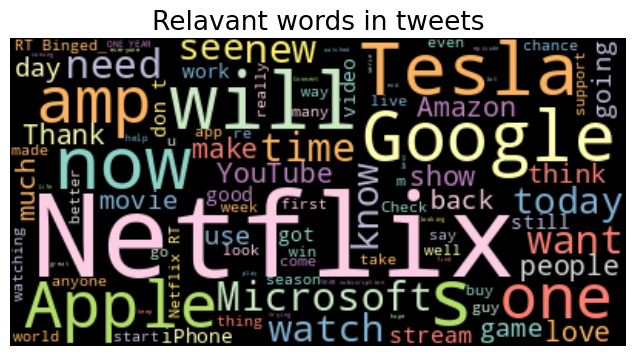

In [ ]:
data.describe()
#Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(data.shape[0],data.shape[1]))

#text = ",".join(review for review in data.full_text if 'tech' not in review and 'https' not in review and 'tech' not in review)

text = ",".join(review for review in data['text'] if 'tech' not in review and 'https' not in review)

wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
#plt.figure(figsize=(10,4))
plt.figure(1,figsize=(15, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.title('Relavant words in tweets',fontsize=19)
plt.show()

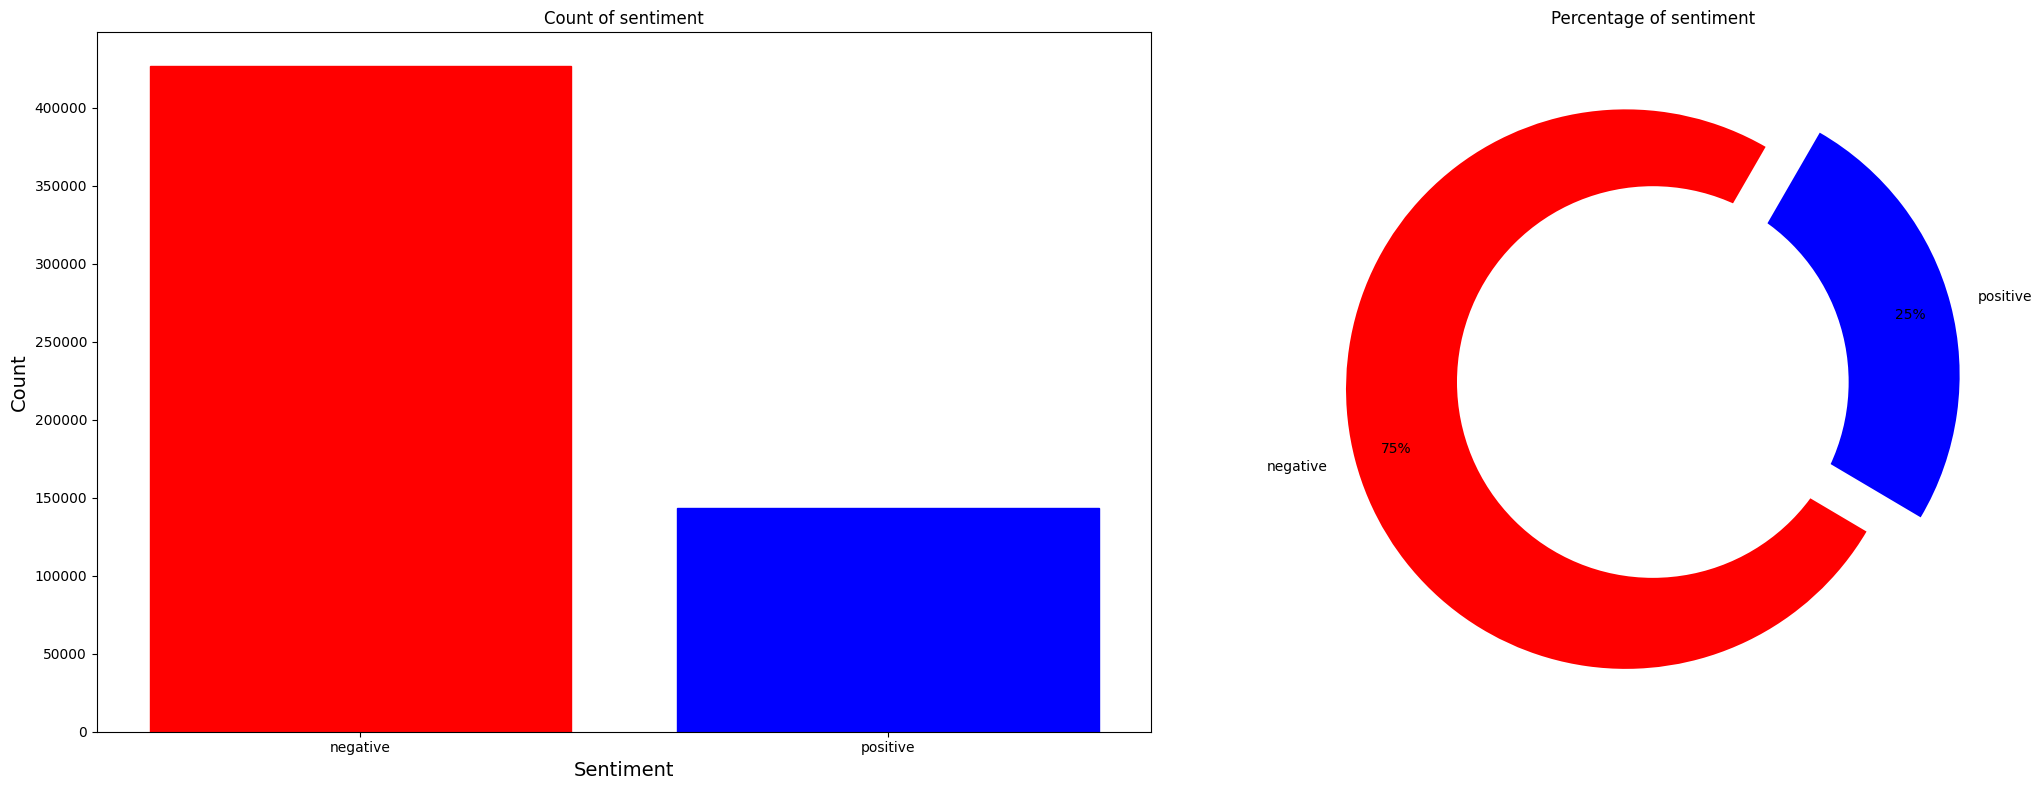

In [ ]:

col = 'sentiment'
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# For the doughnut plot
labels = df[col].value_counts().index
sizes = df[col].value_counts().values
explode = (0.1,)*len(labels)  # Explode all slices for better visibility

# Define the color mapping for sentiment
colors = ['blue' if label == 'positive' else 'red' for label in labels]

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', pctdistance=0.85, startangle=60, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax2.add_artist(centre_circle)
ax2.set_title("Percentage of sentiment")

# For the vertical bar plot with specific colors for positive/negative sentiment
sns.countplot(x=col, data=df, ax=ax1, palette=colors)
ax1.set_title("Count of sentiment")
ax1.set_xlabel("Sentiment", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)

# Set custom colors for each bar in the barplot
for p, label in zip(ax1.patches, df[col].unique()):
    p.set_color('blue' if label == 'positive' else 'red')

plt.tight_layout()
plt.show()


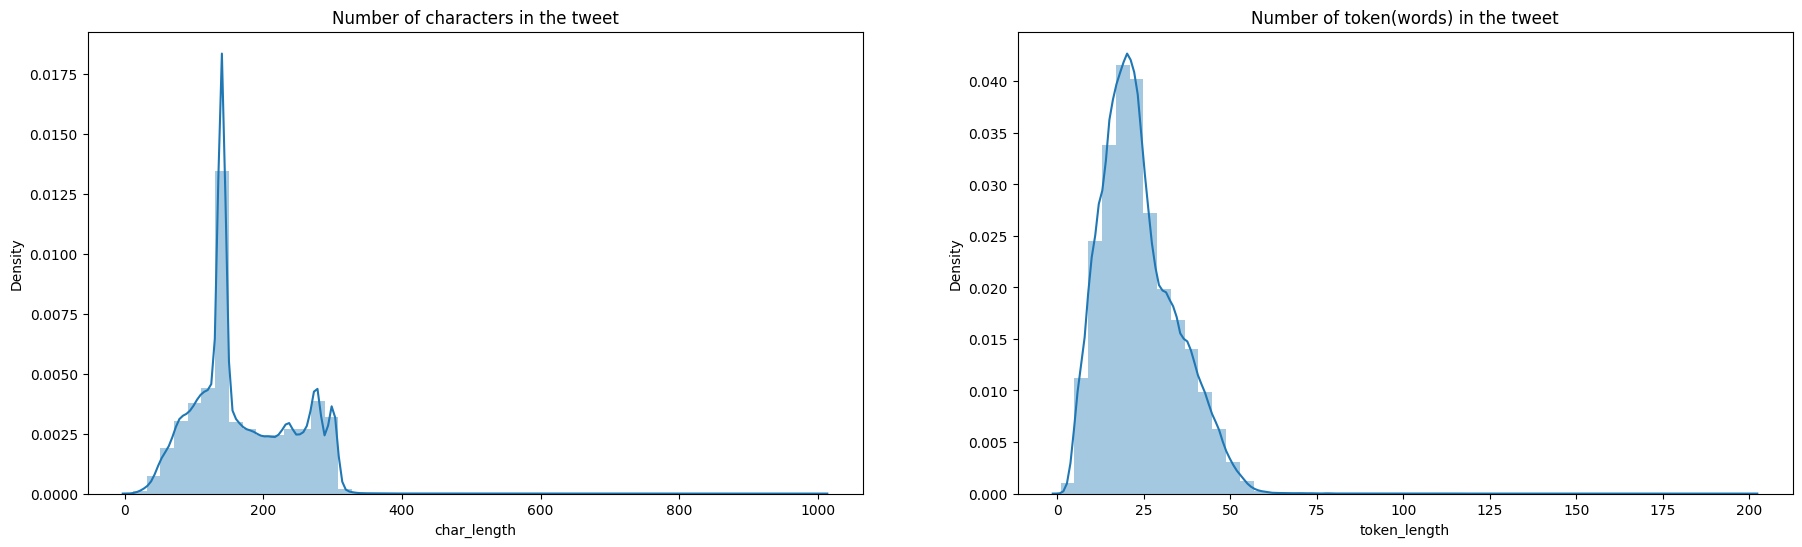

In [ ]:
df['char_length'] = df['text'].apply(lambda x : len(x))
df['token_length'] = df['text'].apply(lambda x : len(x.split(" ")))

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(22,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

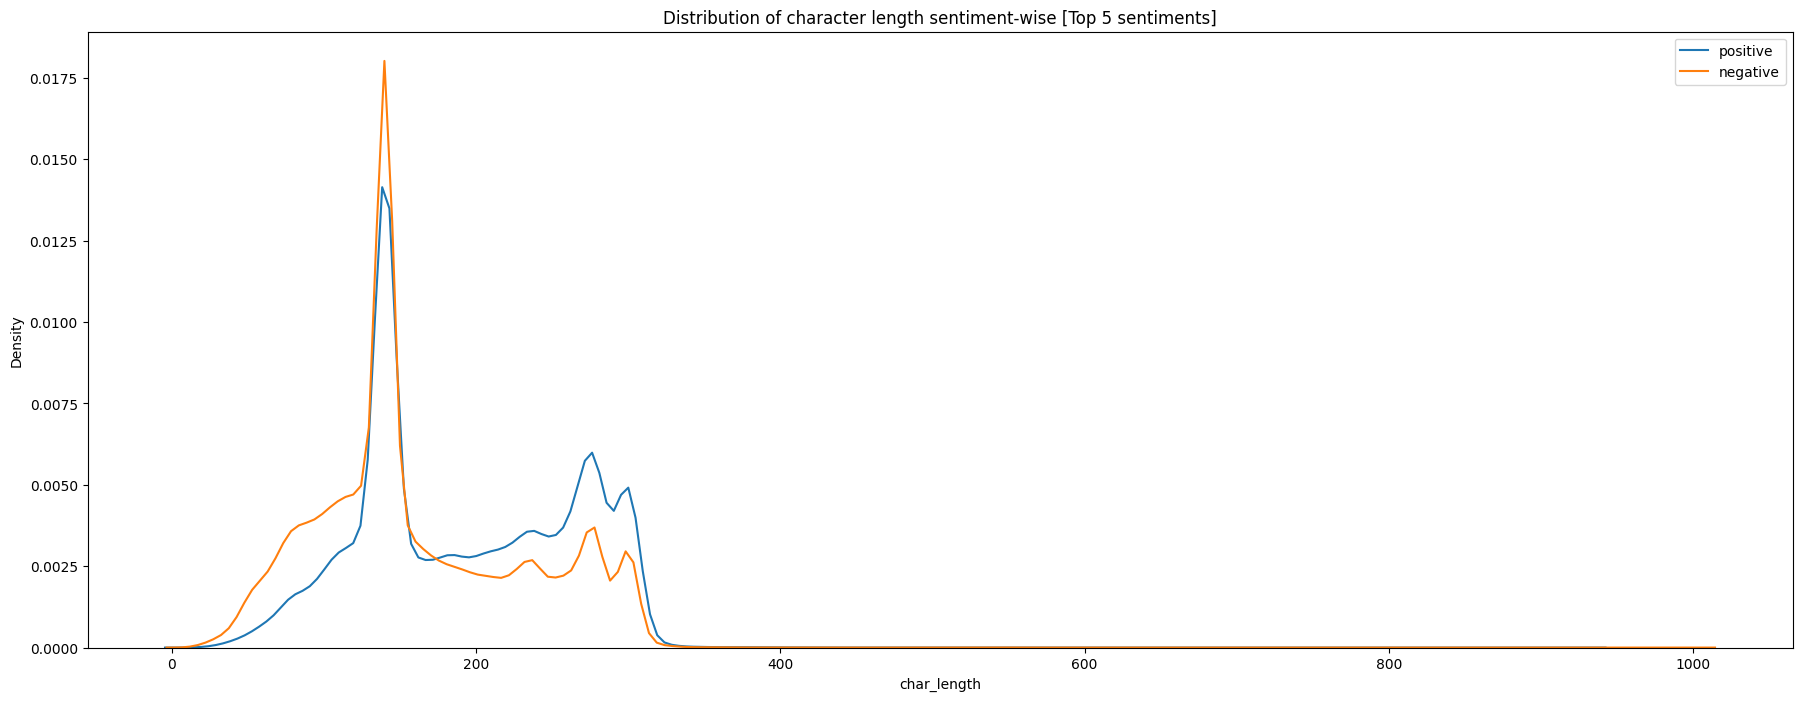

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
for sentiment in df['sentiment'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['sentiment']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()

In [ ]:
pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 1.4 MB/s eta 0:00:00


In [ ]:
import neattext.functions as nfx

ModuleNotFoundError: No module named 'neattext'

In [ ]:
df['Clean_Text'] = df['text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emails)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emojis)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_urls)
df['Clean_Text'] = df['Clean_Text'].apply(str.lower)
df['Clean_Text']

NameError: name 'nfx' is not defined

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
df['sentiment'] = df['Clean_Text'].apply(lambda x : sid.polarity_scores(x)['compound'])

In [ ]:
def vader_sentiment_to_categories(sentiment):
    if sentiment == 0:
        return 'Neutral'
    elif sentiment >= 0.5:
        return 'Positive'
    else:
        return 'Negative'

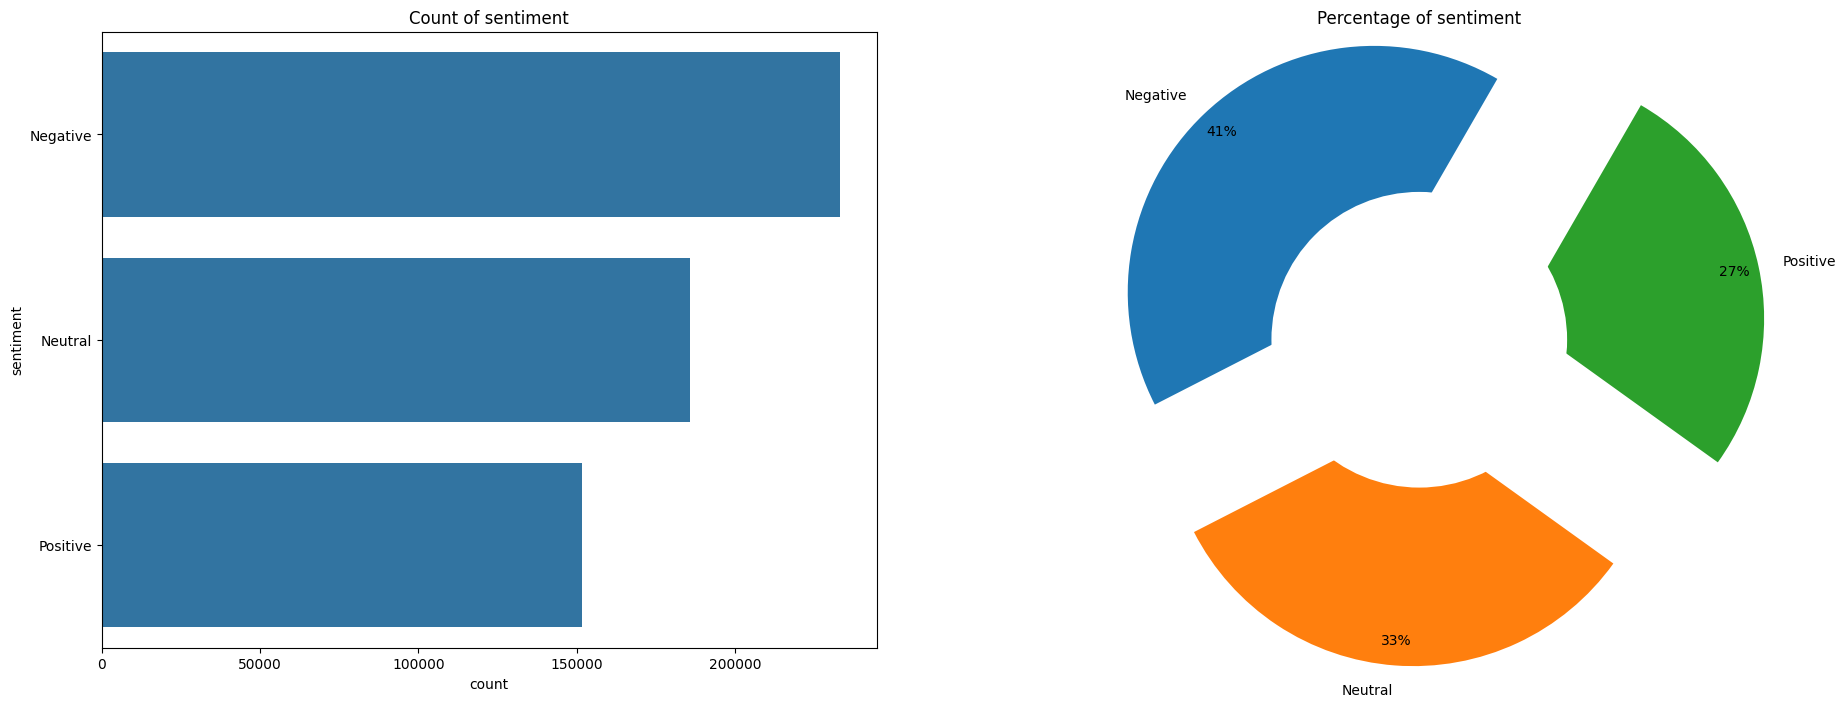

In [ ]:
col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(22,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of sentiment")
ax2.set_title("Percentage of sentiment")
plt.show()

In [ ]:
df['sentiment'] = df['sentiment'].apply(vader_sentiment_to_categories)

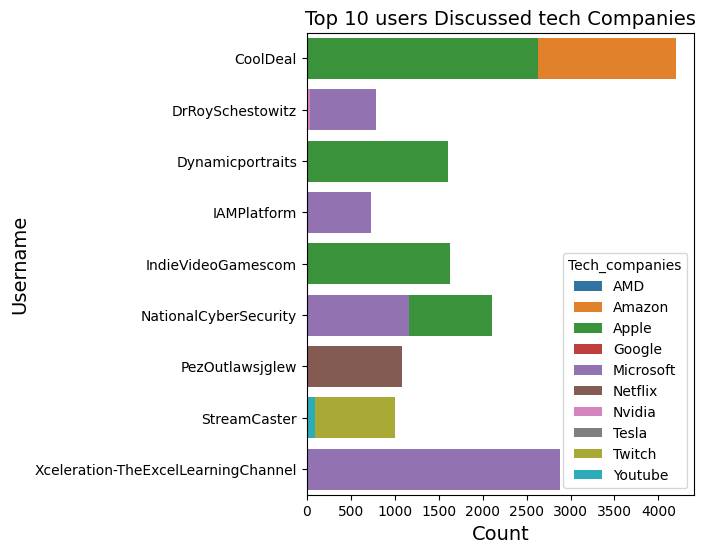

In [ ]:
# Get the top 10 usernames by their count

import pandas as pd


data['username'] = data['username'].str.replace('[^a-zA-Z0-9_-]', '', regex=True)

data['username'] = data['username'].apply(lambda x: 'no_name' if not x else x)

# Create a DataFrame to store counts for each user in each partition category
partition_counts = data[data['username'].isin(top_users)].groupby(['username'])['partition_1'].value_counts().unstack(fill_value=0)

# Plot for each partition category
plt.figure(figsize=(5,6))
for partition in partition_counts.columns:
    sns.barplot(x=partition_counts[partition].values, y=partition_counts.index, label=partition)

plt.title("Top 10 users Discussed tech Companies",fontsize=14)
plt.xlabel("Count",fontsize=14)
plt.ylabel("Username",fontsize=14)
plt.legend(title='Tech_companies')
plt.show()


Text(0, 0.5, 'Followers')

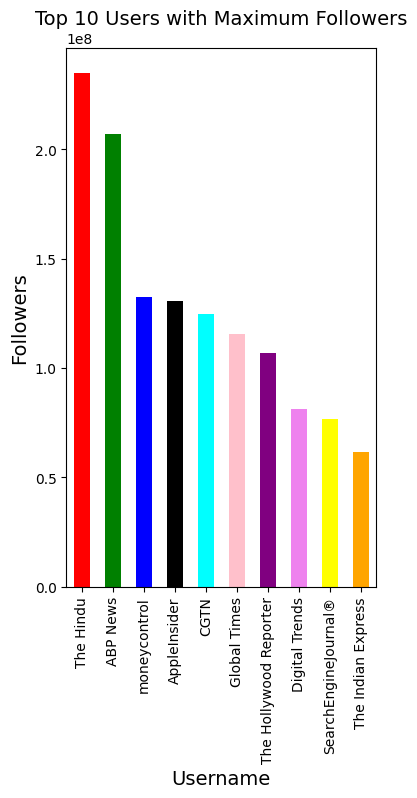

In [ ]:

# First, group the data by 'username' and sum their followers
user_followers = data.groupby('username')['followers'].sum().sort_values(ascending=False)

# Then, take the top 10 of these
top_users = user_followers.head(10)

# Now you can plot
plt.figure(figsize=(4,7))
plt.title("Top 10 Users with Maximum Followers", fontsize=14)
top_users.plot(kind='bar', color=['red', 'green', 'blue', 'black', 'cyan', 'pink', 'purple', 'violet', 'yellow', 'orange'])
plt.xlabel("Username", fontsize=14)
plt.ylabel("Followers", fontsize=14)
#plt.xticks(rotation=45)


In [ ]:
print(data.columns)


Index(['created_at', 'file_name', 'followers', 'friends', 'group_name',
       'location', 'retweet_count', 'screenname', 'search_query', 'text',
       'twitter_id', 'username', 'polarity', 'partition_0', 'partition_1'],
      dtype='object')


Text(0, 0.5, 're_tweet_counts')

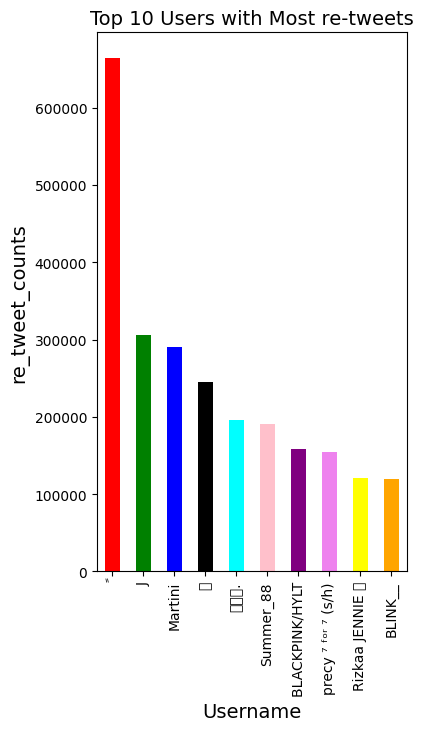

In [ ]:
import pandas as pd

# First, group the data by 'username' and sum their followers
user_followers = data.groupby('username')['retweet_count'].sum().sort_values(ascending=False)

# Then, take the top 10 of these
top_users = user_followers.head(10)
# Now you can plot
plt.figure(figsize=(4,7))
plt.title("Top 10 Users with Most re-tweets", fontsize=14)
top_users.plot(kind='bar', color=['red', 'green', 'blue', 'black', 'cyan', 'pink', 'purple', 'violet', 'yellow', 'orange'])
plt.xlabel("Username", fontsize=14)
plt.ylabel("re_tweet_counts", fontsize=14)
#plt.xticks(rotation=45)


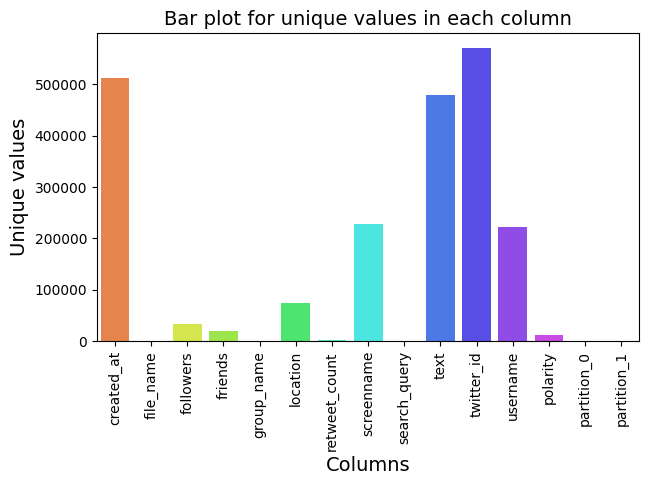

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the unique_values_funct here if it's not already defined
def unique_values_funct(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        unique_count = data_frame[col].nunique()
        uniques.append(unique_count)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

# Now let's create the 'udf' DataFrame using the function
udf = unique_values_funct(data)

# Generate a list of colors based on the number of features
palette = sns.color_palette("hsv", len(udf['Features']))

# Create the bar plot
f, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.barplot(x='Features', y='Uniques', data=udf, alpha=0.8, palette=palette)
plt.title('Bar plot for unique values in each column', fontsize=14)
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.xticks(rotation=90)
plt.show()


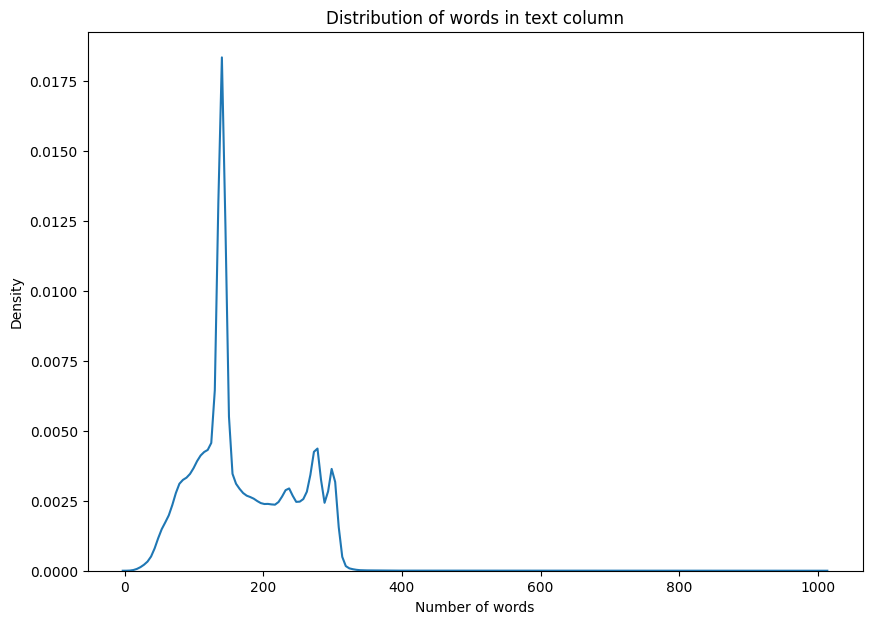

In [ ]:
data["num of words in text"] = data["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(data["num of words in text"])
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the value counts and reset the index to turn the series into a DataFrame
username_count = data['username'].value_counts().reset_index()

# Rename the columns properly
username_count.rename(columns={'index': 'username', 'username': 'retweet_count'}, inplace=True)

# Debug print to ensure that the DataFrame looks correct
print(username_count.head())

# Make sure to reference the exact column names as they are in username_count
plt.figure(figsize=(8, 10))
sns.barplot(x='username', y='retweet_count', data=username_count.head(20))

# Adding text labels for each bar
y = username_count['retweet_count'].head(20)
for index, value in enumerate(y):
    plt.text(value, index, str(value))

plt.title('Top 10 Users with Maximum Retweets')
plt.xlabel('Retweet Count')
plt.ylabel('Username')
plt.show()



                              retweet_count  count
0                                  CoolDeal   6833
1                   National Cyber Security   3267
2  Xceleration - The Excel Learning Channel   2885
3                       Pez Outlaw, sj glew   1981
4                       IndieVideoGames.com   1626


ValueError: Could not interpret value `username` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x1000 with 0 Axes>

In [ ]:
username_count = data['username'].value_counts().reset_index().rename(columns={
    'username':'retweet_count','index':'username'})

plt.figure(figsize=(8, 10))
sns.barplot(y='username',x='retweet_count',data=username_count.head(20))
y=username_count['retweet_count'].head(20)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('UsersTweets with maximum retweet_count',weight='bold', size=13)
plt.ylabel('users', size=12, weight='bold')
plt.xlabel('retweet_count', size=12, weight='bold')
plt.show()

ValueError: Could not interpret value `username` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x1000 with 0 Axes>

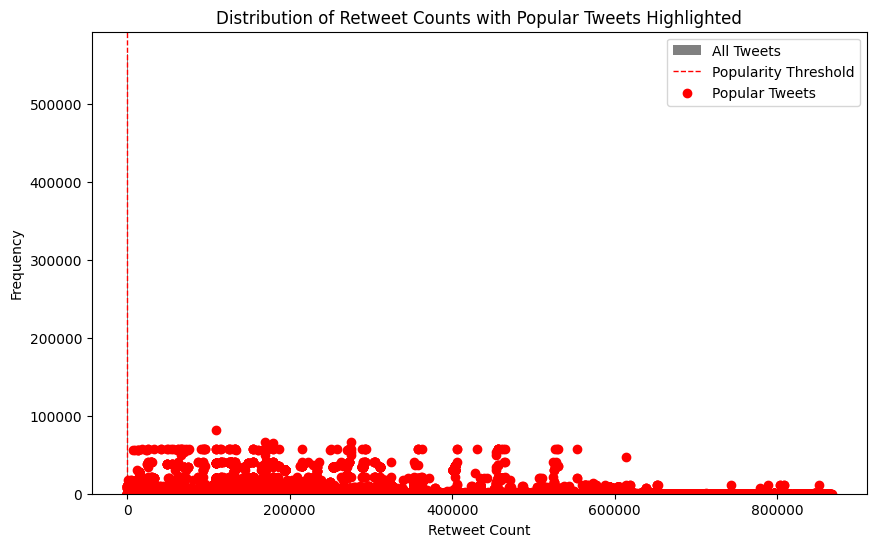

In [ ]:
threshold = data['retweet_count'].quantile(0.9)

# Filter for popular tweets
popular_tweets = data[data['retweet_count'] >= threshold]



# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data['retweet_count'], bins=50, color='gray', label='All Tweets')
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=1, label='Popularity Threshold')
plt.scatter(popular_tweets.index, popular_tweets['retweet_count'], color='red', label='Popular Tweets')
plt.title('Distribution of Retweet Counts with Popular Tweets Highlighted')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Correct the geometry creation line as shown above
# Print the column names of the DataFrame
print(data.columns)

geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='red', markersize=50, alpha=0.6)

plt.title('Locations with Latitude and Longitude')
plt.show()


Index(['created_at', 'file_name', 'followers', 'friends', 'group_name',
       'location', 'retweet_count', 'screenname', 'search_query', 'text',
       'twitter_id', 'username', 'polarity', 'partition_0', 'partition_1'],
      dtype='object')


KeyError: 'Longitude'

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation
    and remove words containing numbers.'''

    text = text.lower()  # Corrected this line
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)



    # Removing stopwords
    text = " ".join([word for word in str(text).split() if word not in stop_words])

    # Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    # Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/WebSocialAssessment/Bigtech - 12-07-2020 till 19-09-2020.csv'
data = pd.read_csv(file_path)

# Check the first few rows to understand the dataset structure
print(data.head())

# Extract and print unique values from the 'location' column to understand its contents
unique_locations = data['location'].unique()
print(unique_locations)


            created_at file_name  followers  friends group_name  \
0  2020-07-12 09:24:26       AMD         25      114        AMD   
1  2020-07-12 09:09:36       AMD        159     1144        AMD   
2  2020-07-12 08:37:31       AMD       4931        7        AMD   
3  2020-07-12 08:31:24       AMD          9      188        AMD   
4  2020-07-12 08:16:45       AMD       1719        1        AMD   

         location  retweet_count     screenname search_query  \
0  United Kingdom            0.0  moffphcgaming         #AMD   
1    digitalverse            4.0     ironparr0t         #AMD   
2             NaN            0.0    ASUS_ROG_IN         #AMD   
3     HAHA no....            0.0    XApochrypha         #AMD   
4    digitalocean            1.0    LinuxDreams         #AMD   

                                                text    twitter_id  \
0  Been on holiday so back now. Gonna try get som...  1.282244e+18   
1  RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...  1.282241e+18   
2 

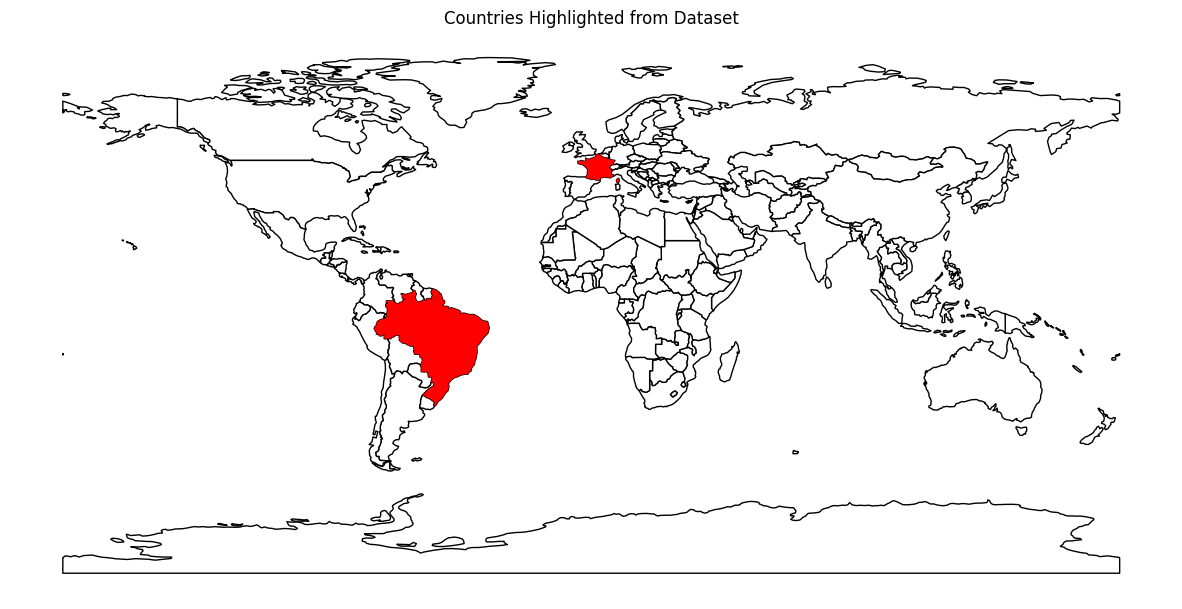

In [ ]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check if each country in the world GeoDataFrame is in the 'location' column of your dataset
world['in_dataset'] = world['name'].apply(lambda x: 1 if x in data['location'].values else 0)

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
base = world.plot(ax=ax, color='white', edgecolor='black')

# Highlight countries present in the dataset
world[world['in_dataset'] == 1].plot(ax=base, color='red')

plt.title('Countries Highlighted from Dataset')
plt.axis('off')  # Optional: Remove axis for better visualization
plt.show()




In [ ]:
most_popular_tweets = data.sort_values(by=['RetweetCount'], ascending=False).head(10)

print(most_popular_tweets[['text', 'RetweetCount', ]])

                                                     text  RetweetCount
98345   RT @Chargers: soo hungry need to find my wife ...         26127
101715  RT @awscloud: Learn how to set up Parse Server...           605
38421   RT @awscloud: Learn how to set up Parse Server...           596
67940   RT @seldo: Pity the poor AWS graphic designer ...           591
94529   RT @seldo: Pity the poor AWS graphic designer ...           591
38524   RT @awscloud: Learn how to set up Parse Server...           586
101693  RT @awscloud: Learn how to set up Parse Server...           585
101665  RT @awscloud: Learn how to set up Parse Server...           537
23141   RT @ksushma140: Dr. @Gurmeetramrahim MEGESTIC ...           531
18844   RT @ksushma140: Dr. @Gurmeetramrahim MEGESTIC ...           519


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to resolve location to country using geopy
def resolve_country(location):
    try:
        # Get location data
        loc = geolocator.geocode(location, addressdetails=True)
        # Extract country name
        country = loc.raw['address']['country']
        return country
    except:
        # If location can't be resolved, return the location as is
        return location

# Load your data
#data = pd.read_csv('path_to_your_data.csv')  # Replace with your actual file path

# Apply the function to resolve countries
data['country'] = data['location'].apply(resolve_country)

# Group by the resolved country names
country_activity = data['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
country_activity.plot(kind='bar', color=['red', 'green', 'blue', 'black', 'cyan', 'magenta', 'purple', 'violet', 'yellow', 'orange'])
plt.title('Top 10 Most Active Countries')
plt.xlabel('Country')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()


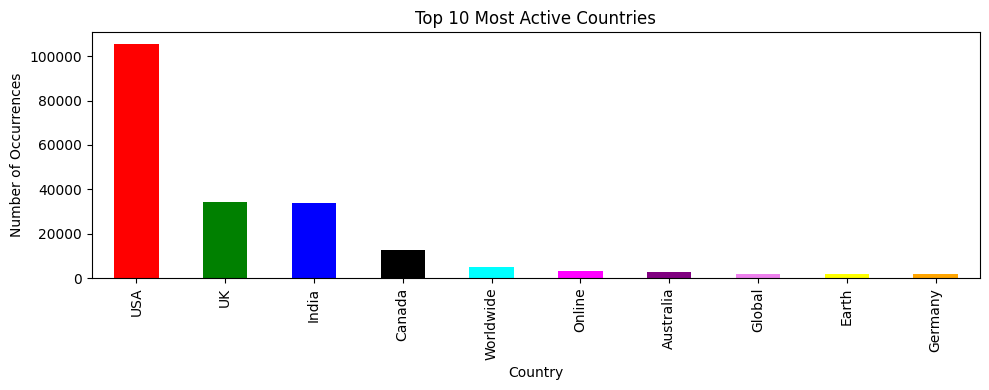

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
#data = pd.read_csv('path_to_your_data.csv')  # Replace with your actual file path

# A function to map locations to their corresponding countries
def map_location_to_country(location):
    usa_aliases = ['USA', 'United States', 'Los Angeles', 'Atlanta', 'New York', 'San Diego, CA', 'Chicago, IL', 'San Francisco, CA', 'michigan', 'Houston, TX']
    uk_aliases = ['UK', 'United Kingdom', 'London, England', 'England, United Kingdom', 'London']
    india_aliases = ['India', 'Mumbai, India']
    canada_aliases = ['Canada', 'Toronto, Ontario']

    if any(alias in location for alias in usa_aliases):
        return 'USA'
    elif any(alias in location for alias in uk_aliases):
        return 'UK'
    elif any(alias in location for alias in india_aliases):
        return 'India'
    elif any(alias in location for alias in canada_aliases):
        return 'Canada'
    else:
        return location

# Apply the function to the location column
data['country'] = data['location'].apply(map_location_to_country)

# Aggregate the occurrences by the normalized country
country_activity = data['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 4))
country_activity.plot(kind='bar', color=['red', 'green', 'blue', 'black', 'cyan', 'magenta', 'purple', 'violet', 'yellow', 'orange'])
plt.title('Top 10 Most Active Countries')
plt.xlabel('Country')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

In [ ]:
def SentimentChecker (newTweets):
    newDF = pd.Data(columns=['text','subjectivity','polarity', 'sentiment'])
    for i in newTweets:
        blob = TextBlob(i) #Create Textblob object of a tweet
        pol = blob.sentiment.polarity
        sub = blob.sentiment.subjectivity

        if pol > 0 : #If polarity of tweets is positive then sent = positive
            sent = "positive"
        elif pol < 0: #If polarity of tweet is negative then sent = negative
            sent = "negative"
        else: #If polarity equals 0 then sent = neutral
            sent = "neutral"

        #Create row for dataframe
        row = [i, sub, pol, sent]
        #Add row to dataframe
        newDF.loc[len(newDF)] = row
    return newDF

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
def JointPlotter(newDF):
    #Create jointplot for polarity and subjectivity of twitter tweets.
    sns.jointplot(data=newDF, x="subjectivity", y="polarity", hue="sentiment")
    plt.show()

    sentimentCounts = pd.DataFrame(newDF["sentiment"].value_counts())
    sentimentCounts = sentimentCounts.rename({'sentiment': 'count'}, axis=1)
    sentimentCounts["sentiment"] = sentimentCounts.index

    sns.barplot(data= sentimentCounts, x="sentiment", y = "count") #Create barplot of sentiment counts

    plt.show()

In [ ]:
def visualiser(subset):
    #Create frequency distribution for "subset"
    fdist = nltk.FreqDist()
    for i in subset["text"]:
        i = nltk.word_tokenize(i)
        for j in i:
            fdist[j] +=1
    fdist.plot(30, cumulative=False)

    #Create word cloud for "subset"
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="black").generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
cleanTweets=data['text'].head(1000)
SentimentDF = SentimentChecker(cleanTweets)
JointPlotter(SentimentDF)

#Call visualiser function to plot a wordcloud and a frequency distribution
visualiser(SentimentDF[SentimentDF["sentiment"] == "positive"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "negative"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "neutral"])

NameError: name 'SentimentChecker' is not defined

In [ ]:
user_activity = data['location'].head(50)
print(user_activity)

0                     United Kingdom
1                       digitalverse
2                        HAHA no....
3                       digitalocean
4                          Amsterdam
5                      Wolverhampton
6                        New Zealand
7                       Florida, USA
8                                USA
9                            Kolkata
10                     United States
11                     Sunnyvale, CA
12                                Wa
13                     San Francisco
14                       Seattle, WA
15                     Mumbai, India
16                              Ohio
17                              #PDX
18    Santa Cruz Tacache de Mina, Oa
19                               愛知県
20                   New Jersey, USA
21                      Florida, USA
22                  Katowice, Polska
23                📍 Altamira Caracas
24                         Ohio, USA
25                  Dandenong Ranges
26          Toronto, Ontario, Canada
2

In [ ]:
pip install geopy folium

In [ ]:
import folium
from folium.plugins import HeatMap

# List of coordinates (latitude, longitude) for the valid locations
coordinates = [
    (54.7023545, -3.2765753),  # United Kingdom
    (52.3727598, 4.8936041),   # Amsterdam
    (52.584765, -2.127567),    # Wolverhampton
    (-41.5000831, 172.8344077), # New Zealand
    (27.9944024, -81.7602544), # Florida, USA
    (39.7837304, -100.4458825),# USA
    (22.54541245, 88.3567751581234), # Kolkata
    (39.7837304, -100.4458825), # United States
    (37.3688301, -122.0363496), # Sunnyvale, CA
    (47.2868352, -120.2126139), # Washington State, USA
    (37.7790262, -122.4199061), # San Francisco
    (47.6038321, -122.3300624), # Seattle, WA
    (19.0759899, 72.8773928),   # Mumbai, India
    (40.2253569, -82.6881395),  # Ohio
    (35.1801883, 136.9065649),  # Aichi Prefecture, Japan
    (40.0757384, -74.4041622),  # New Jersey, USA
    (50.2598987, 19.0215852),   # Katowice, Polska
    (10.4805937, -66.9036063),  # Caracas
    (40.2253569, -82.6881395),  # Ohio, USA
    (-37.8307697, 145.3466104), # Dandenong Ranges
    (43.6534817, -79.3839347),  # Toronto, Ontario, Canada
    (46.7985624, 8.2319736),    # Switzerland
    (40.5886699, -83.1285242),  # Marion, OH
    (25.7741728, -80.19362),    # Miami, FL
    (52.5001698, 5.7480821),    # Netherlands
    (6.3381534, 5.6257495),     # Benin-City, Nigeria
    (36.7014631, -118.7559974), # California, USA
    (52.4796992, -1.9026911),   # Birmingham, UK
    (52.7954791, -0.540240286617432), # England
    (54.7023545, -3.2765753),   # United Kingdom
    (26.2006043, 92.9375739),   # Assam, India
    (39.7392364, -104.9848623), # Denver, CO
    (42.3788774, -72.032366)    # Massachusetts, USA
]

# Create a map centered around the average of the coordinates
avg_lat = sum(lat for lat, _ in coordinates) / len(coordinates)
avg_lon = sum(lon for _, lon in coordinates) / len(coordinates)
map = folium.Map(location=[avg_lat, avg_lon], zoom_start=2)

# Add the heatmap layer
HeatMap(coordinates).add_to(map)

# Save the map to an HTML file
map.save("heatmap.html")

# Display the map
# Note: In a Jupyter notebook, simply output 'map' will display the map inline
print("Heatmap saved to heatmap.html")



Heatmap saved to heatmap.html
